In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [60]:
# import galaxies and clusters tables
df = pd.read_csv('../../clean-HSC-unWISE-W01.csv')
df = df.drop_duplicates()
df_cl = pd.read_table('../../clusters.dat', delim_whitespace=True, usecols=[0,3,4,5,9,11,12], names=['id_cl','ra_cl','dec_cl','phot_z_cl', 'r500_cl','mass_cl','n500_cl'])
df_cl = df_cl[(df_cl['id_cl'].isin(df.id_cl_near)) | (df_cl['id_cl'].isin(df.id_cl))]
df

,ra,dec,W1,W1_err,W2,W2_err,phot_z,phot_z_err,log_st_mass,id_cl_near,...,g_sdssshape_shape12sigma,r_sdssshape_shape12sigma,i_sdssshape_shape12sigma,z_sdssshape_shape12sigma,y_sdssshape_shape12sigma,g_sdssshape_shape22sigma,r_sdssshape_shape22sigma,i_sdssshape_shape22sigma,z_sdssshape_shape22sigma,y_sdssshape_shape22sigma
0,15.55485,-0.38194,20.599,0.123,NaN,NaN,1.0277,0.0589,10.04,[438],...,0.013145,0.008839,0.008504,0.018848,0.014122,0.009221,0.005488,0.005436,0.012928,0.010107
1,15.55513,-0.37570,19.927,0.070,NaN,NaN,0.7425,0.0620,10.25,[438],...,0.019170,0.010274,0.014234,0.023138,0.018843,0.020126,0.011103,0.014022,0.022538,0.017496
2,15.57633,-0.38310,19.894,0.067,20.190,0.181,0.5182,0.0476,10.34,[438],...,0.019002,0.003154,0.002480,0.003153,0.003216,0.013696,0.002390,0.001864,0.002316,0.002306
3,15.56379,-0.37538,19.645,0.054,20.030,0.157,0.4686,0.1265,10.35,[438],...,0.027676,0.008933,0.012338,0.015255,0.012310,0.017454,0.005712,0.007945,0.009013,0.007855
4,15.57984,-0.37478,20.774,0.143,NaN,NaN,0.7332,0.0561,9.95,[438],...,0.010858,0.004989,0.006271,0.009560,0.008613,0.013921,0.007256,0.008553,0.012698,0.011733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21321,22.87448,0.72993,18.917,0.027,19.554,0.101,0.6704,0.0200,11.04,[1037],...,0.036361,0.004820,0.004105,0.012843,0.003393,0.021328,0.002766,0.002098,0.007610,0.001934
21322,22.86844,0.73172,20.361,0.095,NaN,NaN,0.7888,0.0397,10.18,[1037],...,0.030151,0.014807,0.018400,0.044471,0.016527,0.021953,0.009588,0.010443,0.031708,0.010426
21323,22.85698,0.72642,18.627,0.022,18.757,0.051,0.8222,0.2974,11.03,[1037],...,NaN,0.045145,0.024773,0.034438,0.042642,NaN,0.023033,0.013945,0.021107,0.022360
21324,22.87239,0.74036,18.173,0.016,18.351,0.036,0.1839,0.0546,10.56,[1037],...,0.003738,0.001132,0.001741,0.004930,0.002118,0.002217,0.000655,0.000931,0.002750,0.001220


In [82]:
# function dz computes a z range, as a function of cluster's z
def dz(z):
    return 0.1 + z * 0.15

# add dz as a column of clusters' DataFrame
df_cl['d_phot_z'] = dz(df_cl['phot_z_cl'])


# evaluate the column "id_cl_near" (it's a list stored as a string, has the ids of the nearest clusters)
# it's a list and not a single value because some galaxies were near 2 or more clusters
# i feel like this was a questionable decision
df['id_cl_near'] = [eval(s) for s in df['id_cl_near']]


(0.05, 1.65)

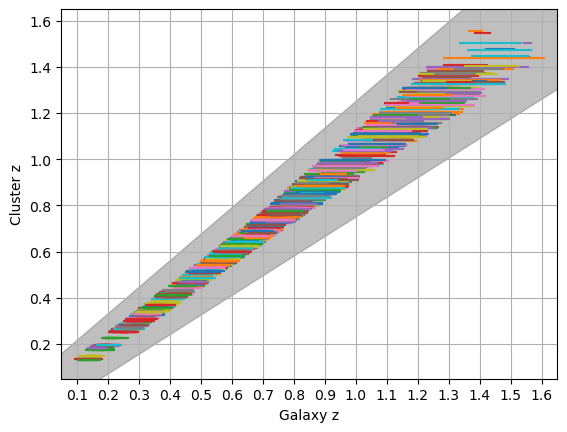

In [83]:
for i,cl in df_cl.iterrows():
    d = df[df.id_cl == cl.id_cl]
    plt.plot(d.phot_z, d.phot_z_cl)

x = np.linspace(0,1.7,50)
plt.fill_between(x, x - dz(x), x + dz(x), alpha = 0.5, color = 'grey')

# plt.scatter(lost_members.phot_z, lost_members.phot_z_cl, color = 'black', zorder = 2000, s = 5)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))
plt.grid()
plt.xlabel('Galaxy z')
plt.ylabel('Cluster z')
plt.xlim(0.05,1.65)
plt.ylim(0.05,1.65)

In [84]:
# create a new DataFrame with galaxies inside dz of each cluster
df_new = pd.DataFrame()
for _,c in df_cl.iterrows():
    # g = df[[any([c.id_cl== ids for ids in gal.id_cl_near]) for _,gal in df.iterrows()]]
    g = df[df['id_cl_near'].apply(lambda x: c.id_cl in x)]
    g = g[abs(g.phot_z - c.phot_z_cl) <= c.d_phot_z]
    df_new = pd.concat([df_new, g])

df_new = df_new.drop_duplicates(subset=['object_id','id_cl'])
df_new

,ra,dec,W1,W1_err,W2,W2_err,phot_z,phot_z_err,log_st_mass,id_cl_near,...,g_sdssshape_shape12sigma,r_sdssshape_shape12sigma,i_sdssshape_shape12sigma,z_sdssshape_shape12sigma,y_sdssshape_shape12sigma,g_sdssshape_shape22sigma,r_sdssshape_shape22sigma,i_sdssshape_shape22sigma,z_sdssshape_shape22sigma,y_sdssshape_shape22sigma
2,15.57633,-0.38310,19.894,0.067,20.190,0.181,0.5182,0.0476,10.34,[438],...,0.019002,0.003154,0.002480,0.003153,0.003216,0.013696,0.002390,0.001864,0.002316,0.002306
3,15.56379,-0.37538,19.645,0.054,20.030,0.157,0.4686,0.1265,10.35,[438],...,0.027676,0.008933,0.012338,0.015255,0.012310,0.017454,0.005712,0.007945,0.009013,0.007855
6,15.57329,-0.37749,19.069,0.033,19.451,0.097,0.4960,0.0491,10.77,[438],...,0.023735,0.004500,0.004972,0.006285,0.005598,0.009475,0.001911,0.002268,0.002797,0.002701
7,15.55836,-0.37804,20.578,0.122,NaN,NaN,0.5149,0.0468,9.87,[438],...,0.021222,0.006699,0.010836,0.012913,0.013401,0.012880,0.004213,0.006331,0.007572,0.008646
9,15.55764,-0.38202,18.709,0.025,19.049,0.068,0.5272,0.0468,10.97,[438],...,0.025239,0.004522,0.002837,0.004013,0.003086,0.019604,0.003431,0.002234,0.003010,0.002408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21320,22.88418,0.72905,20.483,0.105,NaN,NaN,0.7066,0.0462,10.31,[1037],...,0.060368,0.006311,0.006244,0.024868,0.004546,0.044065,0.004783,0.003903,0.017046,0.003441
21321,22.87448,0.72993,18.917,0.027,19.554,0.101,0.6704,0.0200,11.04,[1037],...,0.036361,0.004820,0.004105,0.012843,0.003393,0.021328,0.002766,0.002098,0.007610,0.001934
21322,22.86844,0.73172,20.361,0.095,NaN,NaN,0.7888,0.0397,10.18,[1037],...,0.030151,0.014807,0.018400,0.044471,0.016527,0.021953,0.009588,0.010443,0.031708,0.010426
21323,22.85698,0.72642,18.627,0.022,18.757,0.051,0.8222,0.2974,11.03,[1037],...,NaN,0.045145,0.024773,0.034438,0.042642,NaN,0.023033,0.013945,0.021107,0.022360


In [86]:
print(f'Members before: {df[df.member == 1].shape[0]/df.shape[0] * 100 :.2f}%   ({df[df.member == 1].shape[0]})')
print(f'Members after: {df_new[df_new.member == 1].shape[0]/df_new.shape[0] * 100 :.2f}%  ({df_new[df_new.member == 1].shape[0]})')

Members before: 35.41%   (7537)
Members after: 66.15%  (7537)


In [67]:
# some members were not in the new DataFrame, but I fixed it (it took the whole day and i wanted to die <3)

# d1 = df[df.member == 1]
# d2 = df_new[df_new.member == 1]
# lost_members = d1[~d1['object_id'].isin(d2.object_id)]